In [1]:
### Obesity Risk Prediction Using Ensemble Learning

In [2]:
# Dataset exploration
# Preprocessing
# Graphs
# Reports
# Heatmaps
# Trying something new
# Real Life working ?

In [3]:
# Love to import all libraries at one place only
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
## Just a simple go-through of dataset

In [5]:
original = pd.read_csv("K:/01-KUSHAGRA-CS/1_FUTURE/ML_codebasics/CSVs/devsoc_dataset.csv")
original

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [6]:
alpha=original
alpha

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [7]:
alpha.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
## Pre-processing stage 1

In [9]:
alpha.columns.tolist()

['id',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [10]:
le_Gender = LabelEncoder()
le_family_history_with_overweight = LabelEncoder()
le_FAVC = LabelEncoder()
le_CAEC = LabelEncoder()
le_SMOKE = LabelEncoder()
le_SCC = LabelEncoder()
le_CALC = LabelEncoder()
le_MTRANS = LabelEncoder()
le_NObeyesdad = LabelEncoder()

alpha['Gender_n'] = le_Gender.fit_transform(alpha['Gender'])
alpha['family_history_with_overweight_n'] = le_Gender.fit_transform(alpha['family_history_with_overweight'])
alpha['FAVC_n'] = le_Gender.fit_transform(alpha['FAVC'])
alpha['CAEC_n'] = le_Gender.fit_transform(alpha['CAEC'])
alpha['SMOKE_n'] = le_Gender.fit_transform(alpha['SMOKE'])
alpha['SCC_n'] = le_Gender.fit_transform(alpha['SCC'])
alpha['CALC_n'] = le_Gender.fit_transform(alpha['CALC'])
alpha['MTRANS_n'] = le_Gender.fit_transform(alpha['MTRANS'])
alpha['NObeyesdad_n'] = le_Gender.fit_transform(alpha['NObeyesdad'])

alpha = alpha.drop(['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad'],axis='columns')

alpha

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_n,family_history_with_overweight_n,FAVC_n,CAEC_n,SMOKE_n,SCC_n,CALC_n,MTRANS_n,NObeyesdad_n
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,1,1,2,0,0,1,3,6
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0,1,1,1,0,0,2,0,1
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,1,1,2,0,0,2,3,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,0,1,1,2,0,0,1,3,4
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,1,1,2,0,0,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,1,1,1,2,0,0,1,3,3
20754,20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,1,0,1,1,0,0,1,3,0
20755,20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,1,1,1,2,0,0,2,3,3
20756,20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,1,1,1,2,0,0,2,0,6


In [11]:
## Just for future reference

In [12]:
alpha[alpha.CALC_n==0].head(1)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_n,family_history_with_overweight_n,FAVC_n,CAEC_n,SMOKE_n,SCC_n,CALC_n,MTRANS_n,NObeyesdad_n
25,25,41.318302,1.853223,96.078462,2.0,3.0,3.0,2.0,0.0,1,1,1,2,0,0,0,0,2


In [13]:
original.CALC.iloc[25]

'Frequently'

In [14]:
# Gender - Male : 1, Female : 0
# family_history_with_overweight, FAVC , Smoke , SCC  - yes : 1, no : 0
# CAEC - sometimes : 2, Frequently : 1, Always : 0
# CALC - no : 2, sometimes : 1, Frequently : 0
# Transport - Walking : 4, Public Transportation : 3, MotorBike : 2, Bike : 1, Automobile : 0
# OBESITY TYPE - Overweight Level II : 6, Overweight Level I : 5, Obesity Type III : 4, Obesity Type II : 3, Obesity Type I : 2, Normal Weight : 1, Insufficient Weight : 0

In [15]:
input = alpha.drop(['NObeyesdad_n','id'],axis='columns')
output = alpha['NObeyesdad_n']

In [16]:
input.groupby('CALC_n').describe()

Age                                                              \
          count       mean       std   min        25%        50%        75%   
CALC_n                                                                        
0         529.0  25.111771  7.334926  16.0  19.000000  23.000000  28.363149   
1       15066.0  24.013670  5.293266  14.0  20.406066  23.000000  26.000000   
2        5163.0  23.210167  6.494254  14.0  18.949123  21.414477  23.319878   

               Height            ... SCC_n      MTRANS_n                      \
         max    count      mean  ...   75%  max    count      mean       std   
CALC_n                           ...                                           
0       61.0    529.0  1.720829  ...   0.0  1.0    529.0  1.979206  1.477592   
1       61.0  15066.0  1.703879  ...   0.0  1.0  15066.0  2.542347  1.109339   
2       56.0   5163.0  1.687532  ...   0.0  1.0   5163.0  2.457292  1.206926   

                                 
        min  25%  50%  75%  max  
CALC_n                           
0       0.0  0.0  3.0  3.0  4.0  
1       0.0  3.0  3.0  3.0  4.0  
2       0.0  3.0  3.0  3.0  4.0  

[3 rows x 120 columns]

In [17]:
input.groupby('SCC_n').describe()

Age                                                          \
         count       mean       std   min   25%        50%   75%   max   
SCC_n                                                                    
0      20071.0  23.956355  5.702269  14.0  20.0  22.889099  26.0  61.0   
1        687.0  20.495162  4.008723  14.0  18.0  19.529746  21.0  55.0   

        Height            ... CALC_n      MTRANS_n                           \
         count      mean  ...    75%  max    count      mean       std  min   
SCC_n                     ...                                                 
0      20071.0  1.701794  ...    1.0  2.0  20071.0  2.499626  1.153313  0.0   
1        687.0  1.654977  ...    2.0  2.0    687.0  2.717613  0.983254  0.0   

                           
       25%  50%  75%  max  
SCC_n                      
0      3.0  3.0  3.0  4.0  
1      3.0  3.0  3.0  4.0  

[2 rows x 120 columns]

In [18]:
input.groupby('MTRANS_n').describe()

Age                                                              \
            count       mean       std   min        25%        50%        75%   
MTRANS_n                                                                        
0          3534.0  31.443752  7.667907  16.0  27.000000  31.539393  37.084742   
1            32.0  24.767163  6.503774  17.0  19.750000  23.000000  28.000000   
2            38.0  25.668603  8.260368  18.0  20.000000  22.500000  26.920094   
3         16687.0  22.308432  3.468391  14.0  19.623574  21.856301  25.360050   
4           467.0  20.893358  4.990269  14.0  17.000000  19.000000  23.000000   

                      Height            ... SCC_n        CALC_n            \
                max    count      mean  ...   75%  max    count      mean   
MTRANS_n                                ...                                 
0         61.000000   3534.0  1.710800  ...   0.0  1.0   3534.0  1.224958   
1         41.000000     32.0  1.730689  ...   0.0  1.0     32.0  1.125000   
2         55.000000     38.0  1.705087  ...   0.0  1.0     38.0  1.447368   
3         55.137881  16687.0  1.697288  ...   0.0  1.0  16687.0  1.219932   
4         50.000000    467.0  1.723567  ...   0.0  1.0    467.0  1.316916   

                                              
               std  min  25%  50%   75%  max  
MTRANS_n                                      
0         0.528326  0.0  1.0  1.0  2.00  2.0  
1         0.609071  0.0  1.0  1.0  1.25  2.0  
2         0.503897  1.0  1.0  1.0  2.00  2.0  
3         0.457786  0.0  1.0  1.0  1.00  2.0  
4         0.561834  0.0  1.0  1.0  2.00  2.0  

[5 rows x 120 columns]

In [19]:
input.groupby('SMOKE_n').describe()

Age                                                             \
           count       mean       std   min       25%        50%        75%   
SMOKE_n                                                                       
0        20513.0  23.806990  5.677413  14.0  20.00000  22.771612  26.000000   
1          245.0  26.756709  5.834181  16.0  21.02064  27.000000  31.190219   

                Height            ... CALC_n      MTRANS_n            \
          max    count      mean  ...    75%  max    count      mean   
SMOKE_n                           ...                                  
0        61.0  20513.0  1.699579  ...    1.0  2.0  20513.0  2.509628   
1        55.0    245.0  1.755967  ...    1.0  2.0    245.0  2.273469   

                                            
              std  min  25%  50%  75%  max  
SMOKE_n                                     
0        1.146545  0.0  3.0  3.0  3.0  4.0  
1        1.300500  0.0  2.0  3.0  3.0  4.0  

[2 rows x 120 columns]

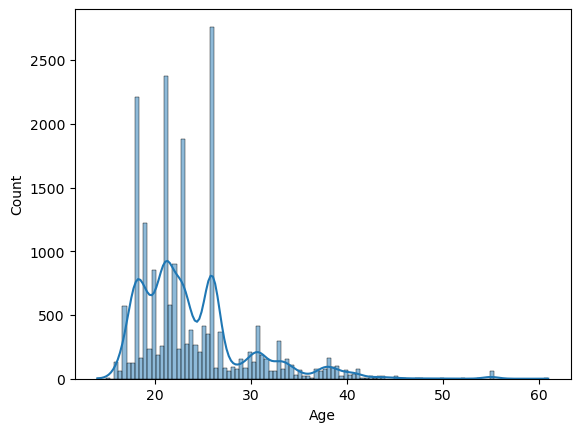

In [20]:
sns.histplot(input['Age'], kde=True)
plt.show()

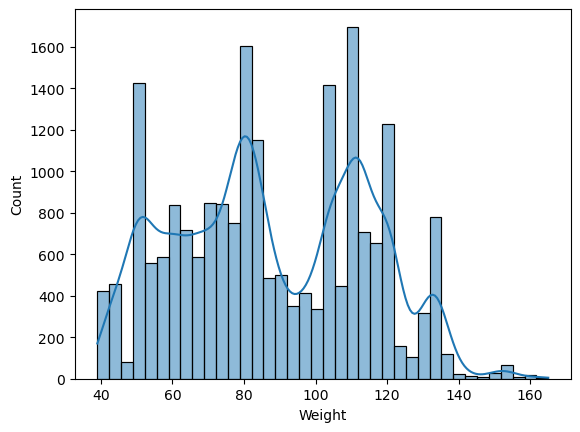

In [21]:
sns.histplot(input['Weight'], kde=True)
plt.show()

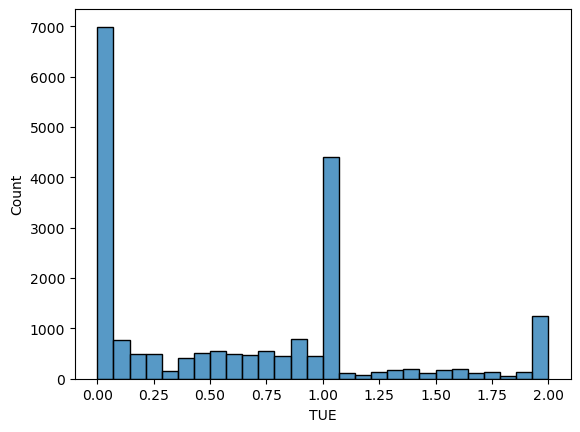

In [22]:
sns.histplot(input['TUE'], kde=False)
plt.show()

In [23]:
## Pre-processing stage 2

In [24]:
beta = StandardScaler()
input_s = beta.fit_transform(input)
final_input = pd.DataFrame(input_s)
final_input

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,1.004152,0.469099,0.30588,0.337845,-0.109287,-0.185009,-0.471288,0.429319
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,-0.995866,0.469099,0.30588,-1.889204,-0.109287,-0.185009,1.639846,-2.182324
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,-0.995866,0.469099,0.30588,0.337845,-0.109287,-0.185009,1.639846,0.429319
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,-0.995866,0.469099,0.30588,0.337845,-0.109287,-0.185009,-0.471288,0.429319
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,1.004152,0.469099,0.30588,0.337845,-0.109287,-0.185009,-0.471288,0.429319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.227725,0.760293,0.996987,0.888355,0.338364,0.201151,0.416056,-0.697686,1.004152,0.469099,0.30588,0.337845,-0.109287,-0.185009,-0.471288,0.429319
20754,-1.027052,0.111729,-1.436296,1.039171,1.756085,-1.691863,1.214691,0.636513,1.004152,-2.131745,0.30588,-1.889204,-0.109287,-0.185009,-0.471288,0.429319
20755,-0.657669,1.366537,0.670717,-0.071439,0.338364,-0.048349,0.210303,0.966092,1.004152,0.469099,0.30588,0.337845,-0.109287,-0.185009,1.639846,0.429319
20756,1.760067,-0.002805,-0.165574,0.422594,-1.119801,0.189694,-1.171141,0.593055,1.004152,0.469099,0.30588,0.337845,-0.109287,-0.185009,1.639846,-2.182324


In [25]:
## Hyper Parameter Tuning using Grid-Search CV

In [26]:
model_params_knn = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5,10,15],
        }  
    },
}

In [27]:
knn_score = []

for model_name, mp in model_params_knn.items():
    trial =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, verbose=3)
    trial.fit(final_input, output)
    knn_score.append({
        'model': model_name,
        'best_score': trial.best_score_,
        'best_params': trial.best_params_
    })
    
gcv_knn = pd.DataFrame(knn_score)
gcv_knn

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .....................n_neighbors=5;, score=0.739 total time=   0.6s
[CV 2/5] END .....................n_neighbors=5;, score=0.745 total time=   0.3s
[CV 3/5] END .....................n_neighbors=5;, score=0.746 total time=   0.3s
[CV 4/5] END .....................n_neighbors=5;, score=0.744 total time=   0.3s
[CV 5/5] END .....................n_neighbors=5;, score=0.736 total time=   0.4s
[CV 1/5] END ....................n_neighbors=10;, score=0.746 total time=   0.5s
[CV 2/5] END ....................n_neighbors=10;, score=0.750 total time=   0.4s
[CV 3/5] END ....................n_neighbors=10;, score=0.742 total time=   0.4s
[CV 4/5] END ....................n_neighbors=10;, score=0.740 total time=   0.4s
[CV 5/5] END ....................n_neighbors=10;, score=0.744 total time=   0.4s
[CV 1/5] END ....................n_neighbors=15;, score=0.743 total time=   0.4s
[CV 2/5] END ....................n_neighbors=15;,

,model,best_score,best_params
0,knn,0.744436,{'n_neighbors': 10}


In [28]:
lr = LogisticRegression(max_iter=21000)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(probability=True)

base = [('rf' , RandomForestClassifier(n_estimators=100)),('svc',SVC())]
final = LogisticRegression(max_iter=21000)

model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [1,5,10],
            'kernel': ['rbf','linear','poly','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,300]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(max_iter=21000),
        'params': {
            'C': [1,5,10]
        }
    },
    'gauss biasing': {
        'model': GaussianNB(),
        'params': {}
    },
    'ada boosting': {
        'model': AdaBoostClassifier(algorithm='SAMME'),
        'params': {
            'learning_rate': [1,2],
            'n_estimators': [50,100]
        }
    },
    'gradient boosting': {
            'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100,300],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,3],
            'max_depth': [3,4]
        }
    },
    'xg boosting': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100,150]
        }
    },
    'voting': {
        'model': VotingClassifier(estimators=[('lr',lr),('rf',rf),('svc',svc)]),
        'params': {
            'voting': ['hard','soft']
        }
    },
    'stacking': {
        'model': StackingClassifier(estimators=base,final_estimator=final),
        'params': {
            'cv': [10,20]
        }
    },
}

In [29]:
scores = []

for model_name, mp in model_params.items():
    daisy =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, verbose=3)
    daisy.fit(final_input, output)
    scores.append({
        'model': model_name,
        'best_score': daisy.best_score_,
        'best_params': daisy.best_params_
    })
    
gcv = pd.DataFrame(scores)
gcv

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.855 total time=   8.5s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.855 total time=  10.8s
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.861 total time=  10.8s
[CV 4/5] END ...................C=1, kernel=rbf;, score=0.871 total time=   8.7s
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.858 total time=   8.2s
[CV 1/5] END ................C=1, kernel=linear;, score=0.862 total time=   3.8s
[CV 2/5] END ................C=1, kernel=linear;, score=0.865 total time=   3.9s
[CV 3/5] END ................C=1, kernel=linear;, score=0.862 total time=   5.3s
[CV 4/5] END ................C=1, kernel=linear;, score=0.872 total time=   4.8s
[CV 5/5] END ................C=1, kernel=linear;, score=0.870 total time=   3.8s
[CV 1/5] END ..................C=1, kernel=poly;, score=0.829 total time=   5.7s
[CV 2/5] END ..................C=1, kernel=poly;

,model,best_score,best_params
0,svm,0.866943,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.898979,{'n_estimators': 300}
2,logistic_regression,0.862849,{'C': 10}
3,gauss biasing,0.661673,{}
4,ada boosting,0.727143,"{'learning_rate': 1, 'n_estimators': 100}"
5,gradient boosting,0.906060,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s..."
6,xg boosting,0.906060,{'n_estimators': 100}
7,voting,0.888959,{'voting': 'soft'}
8,stacking,0.898112,{'cv': 20}


In [30]:
gcv

,model,best_score,best_params
0,svm,0.866943,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.898979,{'n_estimators': 300}
2,logistic_regression,0.862849,{'C': 10}
3,gauss biasing,0.661673,{}
4,ada boosting,0.727143,"{'learning_rate': 1, 'n_estimators': 100}"
5,gradient boosting,0.906060,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s..."
6,xg boosting,0.906060,{'n_estimators': 100}
7,voting,0.888959,{'voting': 'soft'}
8,stacking,0.898112,{'cv': 20}


In [31]:
print(gcv.loc[5, 'best_params'])

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}


In [32]:
## Training and scoring all models together
## Confusion Matrix and Heatmaps for better understanding at each level

In [33]:
x_train,x_test,y_train,y_test = train_test_split(final_input,output,test_size=0.2)

In [34]:
all_classes = sorted(np.unique(y_test))

def report(model,x_train,x_test,y_train,y_test,model_name):
    model.fit(x_train,y_train)
    df = pd.DataFrame(classification_report(y_test, model.predict(x_test),zero_division=0,output_dict=True,labels=all_classes))
    fin = df.transpose()
    fin['model'] = model_name
    return fin

In [35]:
def get_cm(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    return cm

In [36]:
lr_final_report = report(LogisticRegression(max_iter=21000, C=10),x_train,x_test,y_train,y_test,'Logistic')
lr_final_report

,precision,recall,f1-score,support,model
0,0.880859,0.951477,0.914807,474.000000,Logistic
1,0.853492,0.814634,0.833611,615.000000,Logistic
2,0.823065,0.856908,0.839645,608.000000,Logistic
3,0.940276,0.959375,0.949729,640.000000,Logistic
4,0.994975,0.998739,0.996853,793.000000,Logistic
5,0.710526,0.692308,0.701299,468.000000,Logistic
6,0.730097,0.678700,0.703461,554.000000,Logistic
accuracy,0.861994,0.861994,0.861994,0.861994,Logistic
macro avg,0.847613,0.850306,0.848487,4152.000000,Logistic
weighted avg,0.859981,0.861994,0.860561,4152.000000,Logistic


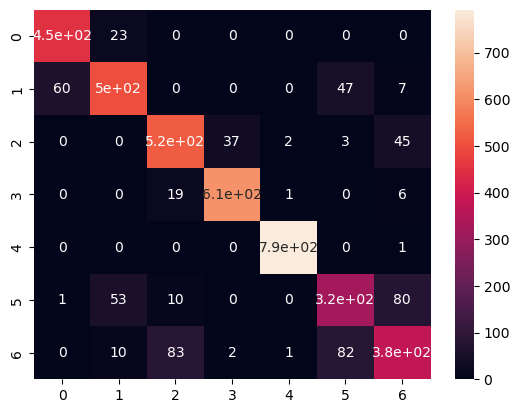

In [37]:
cm_lr = get_cm(LogisticRegression(max_iter=21000, C=10),x_train,x_test,y_train,y_test)
sns.heatmap(cm_lr, annot = True)
plt.show()

In [38]:
knn_final_report = report(KNeighborsClassifier(n_neighbors=10),x_train,x_test,y_train,y_test,'KNN')
knn_final_report

,precision,recall,f1-score,support,model
0,0.718750,0.776371,0.746450,474.000000,KNN
1,0.584683,0.645528,0.613601,615.000000,KNN
2,0.712934,0.743421,0.727858,608.000000,KNN
3,0.892330,0.945312,0.918058,640.000000,KNN
4,0.997478,0.997478,0.997478,793.000000,KNN
5,0.518987,0.438034,0.475087,468.000000,KNN
6,0.639913,0.532491,0.581281,554.000000,KNN
accuracy,0.749759,0.749759,0.749759,0.749759,KNN
macro avg,0.723582,0.725519,0.722830,4152.000000,KNN
weighted avg,0.744995,0.749759,0.745821,4152.000000,KNN


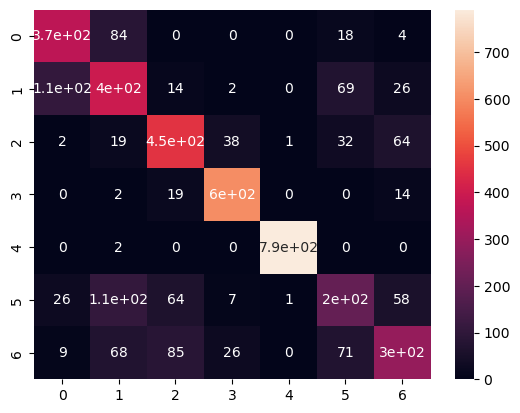

In [39]:
cm_knn = get_cm(KNeighborsClassifier(n_neighbors=10),x_train,x_test,y_train,y_test)
sns.heatmap(cm_knn, annot = True)
plt.show()

In [40]:
rf_final_report = report(RandomForestClassifier(n_estimators=300),x_train,x_test,y_train,y_test,'Random forest')
rf_final_report

,precision,recall,f1-score,support,model
0,0.932489,0.932489,0.932489,474.000000,Random forest
1,0.859594,0.895935,0.877389,615.000000,Random forest
2,0.897394,0.906250,0.901800,608.000000,Random forest
3,0.971831,0.970313,0.971071,640.000000,Random forest
4,1.000000,0.997478,0.998737,793.000000,Random forest
5,0.804545,0.756410,0.779736,468.000000,Random forest
6,0.826401,0.824910,0.825655,554.000000,Random forest
accuracy,0.907274,0.907274,0.907274,0.907274,Random forest
macro avg,0.898894,0.897684,0.898125,4152.000000,Random forest
weighted avg,0.906934,0.907274,0.906961,4152.000000,Random forest


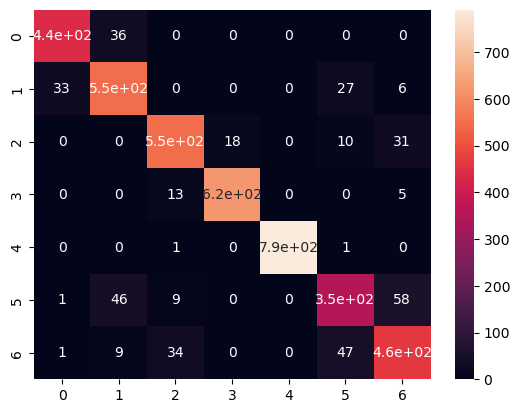

In [41]:
cm_rf = get_cm(RandomForestClassifier(n_estimators=300),x_train,x_test,y_train,y_test)
sns.heatmap(cm_rf, annot = True,)
plt.show()

In [42]:
svc_final_report = report(SVC(C=10, kernel='linear'),x_train,x_test,y_train,y_test,'SVM')
svc_final_report

,precision,recall,f1-score,support,model
0,0.877907,0.955696,0.915152,474.000000,SVM
1,0.862069,0.813008,0.836820,615.000000,SVM
2,0.820755,0.858553,0.839228,608.000000,SVM
3,0.946154,0.960938,0.953488,640.000000,SVM
4,0.998737,0.997478,0.998107,793.000000,SVM
5,0.718884,0.715812,0.717345,468.000000,SVM
6,0.753906,0.696751,0.724203,554.000000,SVM
accuracy,0.867534,0.867534,0.867534,0.867534,SVM
macro avg,0.854059,0.856891,0.854906,4152.000000,SVM
weighted avg,0.866319,0.867534,0.866410,4152.000000,SVM


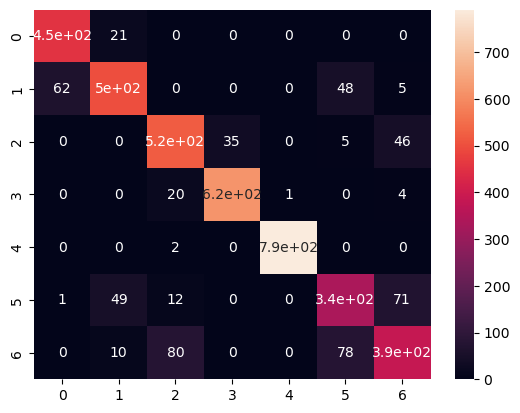

In [43]:
cm_svc = get_cm(SVC(C=10, kernel='linear'),x_train,x_test,y_train,y_test)
sns.heatmap(cm_svc, annot = True)
plt.show()

In [44]:
ada_final_report = report(AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=100),x_train,x_test,y_train,y_test,'ADA Boost')
ada_final_report

,precision,recall,f1-score,support,model
0,0.630491,0.514768,0.566783,474.000000,ADA Boost
1,0.554072,0.674797,0.608504,615.000000,ADA Boost
2,0.408046,0.700658,0.515738,608.000000,ADA Boost
3,0.935361,0.384375,0.544850,640.000000,ADA Boost
4,0.956469,0.997478,0.976543,793.000000,ADA Boost
5,0.731481,0.506410,0.598485,468.000000,ADA Boost
6,0.512545,0.516245,0.514388,554.000000,ADA Boost
accuracy,0.637042,0.637042,0.637042,0.637042,ADA Boost
macro avg,0.675495,0.613533,0.617899,4152.000000,ADA Boost
weighted avg,0.691496,0.637042,0.636951,4152.000000,ADA Boost


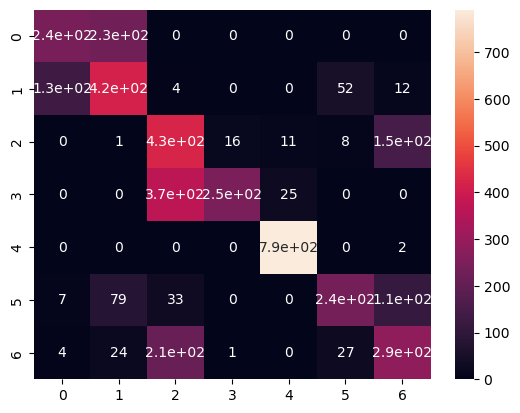

In [45]:
cm_ada = get_cm(AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=100),x_train,x_test,y_train,y_test)
sns.heatmap(cm_ada, annot = True)
plt.show()

In [46]:
grad_final_report = report(GradientBoostingClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300),x_train,x_test,y_train,y_test,'Gradient Boost')
grad_final_report

,precision,recall,f1-score,support,model
0,0.926625,0.932489,0.929548,474.000000,Gradient Boost
1,0.876404,0.887805,0.882068,615.000000,Gradient Boost
2,0.888889,0.907895,0.898291,608.000000,Gradient Boost
3,0.967239,0.968750,0.967994,640.000000,Gradient Boost
4,1.000000,0.997478,0.998737,793.000000,Gradient Boost
5,0.810573,0.786325,0.798265,468.000000,Gradient Boost
6,0.831193,0.817690,0.824386,554.000000,Gradient Boost
accuracy,0.908478,0.908478,0.908478,0.908478,Gradient Boost
macro avg,0.900132,0.899776,0.899898,4152.000000,Gradient Boost
weighted avg,0.908120,0.908478,0.908249,4152.000000,Gradient Boost


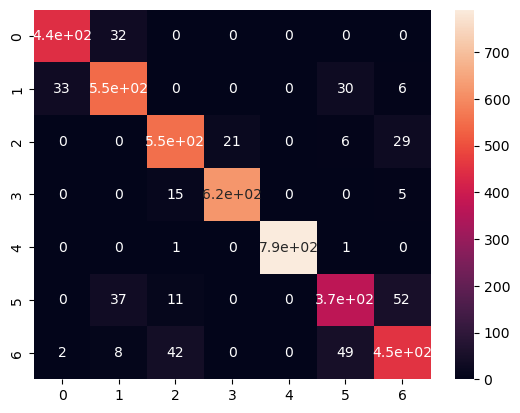

In [47]:
cm_grad = get_cm(GradientBoostingClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300),x_train,x_test,y_train,y_test)
sns.heatmap(cm_grad, annot = True)
plt.show()

In [48]:
xgb_final_report = report(XGBClassifier(n_estimators=100),x_train,x_test,y_train,y_test,'XGBoost')
xgb_final_report

,precision,recall,f1-score,support,model
0,0.920668,0.930380,0.925498,474.000000,XGBoost
1,0.868254,0.889431,0.878715,615.000000,XGBoost
2,0.897227,0.904605,0.900901,608.000000,XGBoost
3,0.962848,0.971875,0.967341,640.000000,XGBoost
4,0.998737,0.997478,0.998107,793.000000,XGBoost
5,0.824053,0.790598,0.806979,468.000000,XGBoost
6,0.843462,0.826715,0.835005,554.000000,XGBoost
accuracy,0.910164,0.910164,0.910164,0.910164,XGBoost
macro avg,0.902179,0.901583,0.901792,4152.000000,XGBoost
weighted avg,0.909693,0.910164,0.909851,4152.000000,XGBoost


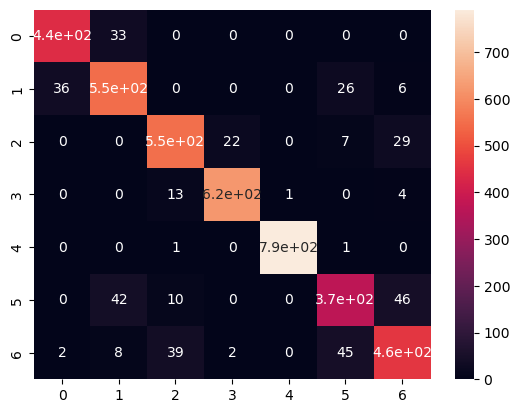

In [49]:
cm_xgb = get_cm(XGBClassifier(n_estimators=100),x_train,x_test,y_train,y_test)
sns.heatmap(cm_xgb, annot = True)
plt.show()

In [50]:
lr = LogisticRegression(max_iter=21000)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC()
hvote_final_report = report(VotingClassifier(estimators=[('lr',lr),('rf',rf),('svc',svc),], voting='hard'),x_train,x_test,y_train,y_test,'Hard Voting')
hvote_final_report

,precision,recall,f1-score,support,model
0,0.917184,0.934599,0.925810,474.000000,Hard Voting
1,0.839937,0.861789,0.850722,615.000000,Hard Voting
2,0.861199,0.898026,0.879227,608.000000,Hard Voting
3,0.964286,0.970313,0.967290,640.000000,Hard Voting
4,1.000000,0.997478,0.998737,793.000000,Hard Voting
5,0.751131,0.709402,0.729670,468.000000,Hard Voting
6,0.802657,0.763538,0.782609,554.000000,Hard Voting
accuracy,0.887765,0.887765,0.887765,0.887765,Hard Voting
macro avg,0.876628,0.876449,0.876295,4152.000000,Hard Voting
weighted avg,0.886623,0.887765,0.886973,4152.000000,Hard Voting


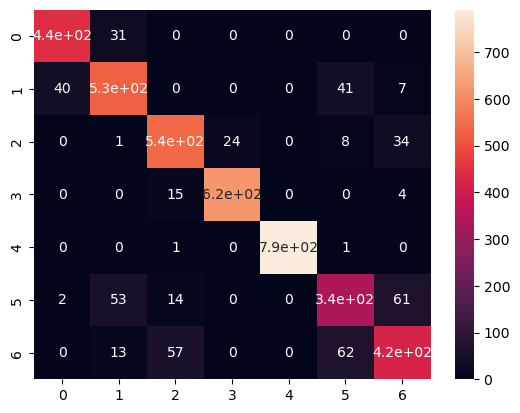

In [51]:
lr = LogisticRegression(max_iter=21000)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC()
cm_hvote = get_cm(VotingClassifier(estimators=[('lr',lr),('rf',rf),('svc',svc),], voting='hard'),x_train,x_test,y_train,y_test)
sns.heatmap(cm_hvote, annot = True)
plt.show()

In [52]:
lr = LogisticRegression(max_iter=21000)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(probability=True)
svote_final_report = report(VotingClassifier(estimators=[('lr',lr),('rf',rf),('svc',svc),], voting='hard'),x_train,x_test,y_train,y_test,'Soft Voting')
svote_final_report

,precision,recall,f1-score,support,model
0,0.908163,0.938819,0.923237,474.000000,Soft Voting
1,0.841091,0.852033,0.846527,615.000000,Soft Voting
2,0.862179,0.884868,0.873377,608.000000,Soft Voting
3,0.964286,0.970313,0.967290,640.000000,Soft Voting
4,1.000000,0.997478,0.998737,793.000000,Soft Voting
5,0.746102,0.715812,0.730643,468.000000,Soft Voting
6,0.794727,0.761733,0.777880,554.000000,Soft Voting
accuracy,0.885356,0.885356,0.885356,0.885356,Soft Voting
macro avg,0.873793,0.874436,0.873956,4152.000000,Soft Voting
weighted avg,0.884283,0.885356,0.884680,4152.000000,Soft Voting


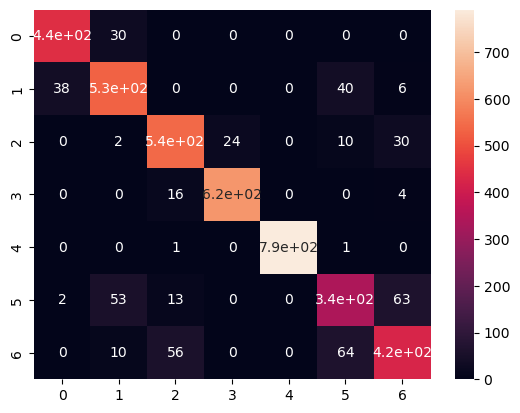

In [53]:
lr = LogisticRegression(max_iter=21000)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(probability=True)
cm_svote = get_cm(VotingClassifier(estimators=[('lr',lr),('rf',rf),('svc',svc),], voting='hard'),x_train,x_test,y_train,y_test)
sns.heatmap(cm_svote, annot = True)
plt.show()

In [54]:
base = [('rf' , RandomForestClassifier(n_estimators=100)),('svc',SVC())]
final = LogisticRegression(max_iter=21000)
stack_final_report = report(StackingClassifier(estimators=base,final_estimator=final,cv=10),x_train,x_test,y_train,y_test,'Stacking')
stack_final_report

,precision,recall,f1-score,support,model
0,0.924370,0.928270,0.926316,474.000000,Stacking
1,0.865506,0.889431,0.877306,615.000000,Stacking
2,0.894910,0.896382,0.895645,608.000000,Stacking
3,0.970173,0.965625,0.967894,640.000000,Stacking
4,1.000000,0.996217,0.998105,793.000000,Stacking
5,0.786813,0.764957,0.775731,468.000000,Stacking
6,0.817360,0.815884,0.816621,554.000000,Stacking
accuracy,0.903179,0.903179,0.903179,0.903179,Stacking
macro avg,0.894162,0.893824,0.893945,4152.000000,Stacking
weighted avg,0.903059,0.903179,0.903075,4152.000000,Stacking


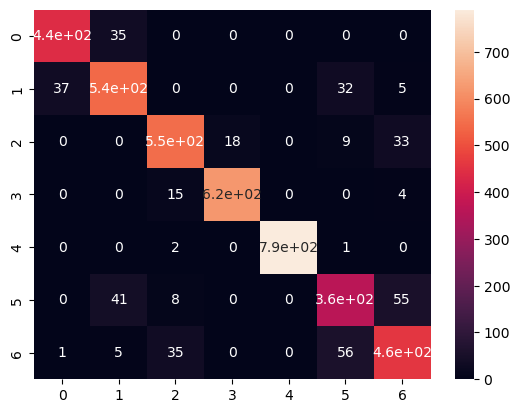

In [55]:
base = [('rf' , RandomForestClassifier(n_estimators=100)),('svc',SVC())]
final = LogisticRegression(max_iter=21000)
cm_stack = get_cm(StackingClassifier(estimators=base,final_estimator=final,cv=10),x_train,x_test,y_train,y_test)
sns.heatmap(cm_stack, annot = True)
plt.show()

In [56]:
## Combining all

In [57]:
FINAL_AFTER_HYPERTUNING_COLUMN = pd.concat([lr_final_report,rf_final_report,svc_final_report,ada_final_report,grad_final_report,xgb_final_report,hvote_final_report,svote_final_report,stack_final_report], ignore_index=False, axis=1)
FINAL_AFTER_HYPERTUNING_COLUMN

,precision,recall,f1-score,support,model,precision,recall,f1-score,support,model,...,precision,recall,f1-score,support,model,precision,recall,f1-score,support,model
0,0.880859,0.951477,0.914807,474.000000,Logistic,0.932489,0.932489,0.932489,474.000000,Random forest,...,0.908163,0.938819,0.923237,474.000000,Soft Voting,0.924370,0.928270,0.926316,474.000000,Stacking
1,0.853492,0.814634,0.833611,615.000000,Logistic,0.859594,0.895935,0.877389,615.000000,Random forest,...,0.841091,0.852033,0.846527,615.000000,Soft Voting,0.865506,0.889431,0.877306,615.000000,Stacking
2,0.823065,0.856908,0.839645,608.000000,Logistic,0.897394,0.906250,0.901800,608.000000,Random forest,...,0.862179,0.884868,0.873377,608.000000,Soft Voting,0.894910,0.896382,0.895645,608.000000,Stacking
3,0.940276,0.959375,0.949729,640.000000,Logistic,0.971831,0.970313,0.971071,640.000000,Random forest,...,0.964286,0.970313,0.967290,640.000000,Soft Voting,0.970173,0.965625,0.967894,640.000000,Stacking
4,0.994975,0.998739,0.996853,793.000000,Logistic,1.000000,0.997478,0.998737,793.000000,Random forest,...,1.000000,0.997478,0.998737,793.000000,Soft Voting,1.000000,0.996217,0.998105,793.000000,Stacking
5,0.710526,0.692308,0.701299,468.000000,Logistic,0.804545,0.756410,0.779736,468.000000,Random forest,...,0.746102,0.715812,0.730643,468.000000,Soft Voting,0.786813,0.764957,0.775731,468.000000,Stacking
6,0.730097,0.678700,0.703461,554.000000,Logistic,0.826401,0.824910,0.825655,554.000000,Random forest,...,0.794727,0.761733,0.777880,554.000000,Soft Voting,0.817360,0.815884,0.816621,554.000000,Stacking
accuracy,0.861994,0.861994,0.861994,0.861994,Logistic,0.907274,0.907274,0.907274,0.907274,Random forest,...,0.885356,0.885356,0.885356,0.885356,Soft Voting,0.903179,0.903179,0.903179,0.903179,Stacking
macro avg,0.847613,0.850306,0.848487,4152.000000,Logistic,0.898894,0.897684,0.898125,4152.000000,Random forest,...,0.873793,0.874436,0.873956,4152.000000,Soft Voting,0.894162,0.893824,0.893945,4152.000000,Stacking
weighted avg,0.859981,0.861994,0.860561,4152.000000,Logistic,0.906934,0.907274,0.906961,4152.000000,Random forest,...,0.884283,0.885356,0.884680,4152.000000,Soft Voting,0.903059,0.903179,0.903075,4152.000000,Stacking


In [58]:
## Self-Crafted Model Attempt – Static Tuning with scope of improvement



## (line 1)
## cascading = pd.DataFrame()
## model = ['lr','rf','svc','ada','grad','xgb','hvote','svote','stack',]
## Prec = {}
## for modelname in model:
##     cascading[modelname] = None
##     current_report = globals()[f'{modelname}_final_report']
##     for i in range (0,7):
##         Prec[f'{modelname}_{i}'] = current_report.loc[str(i),'precision']
##         cascading.loc[i, modelname] = Prec[f'{modelname}_{i}']
## 
## 
## 
## (line 2)
## cascading.style.apply(lambda x: ['background-color: lightgreen' if v == x.max() else '' for v in x], axis=1)    ## Used Chat-Gpt exclusively here :(
## 
## 
## 
## (line 3)
## cascad_test=x_test.values
## base = [('rf' , RandomForestClassifier(n_estimators=100)),('svc',SVC())]
## final = LogisticRegression(max_iter=21000)
## stack_model = StackingClassifier(estimators=base,final_estimator=final,cv=10)
## stack_model.fit(x_train,y_train)
## rf_model = RandomForestClassifier(n_estimators=100)
## rf_model.fit(x_train,y_train)
## xgb_model = XGBClassifier(n_estimators=100)
## xgb_model.fit(x_train,y_train)
## def hybrid_predict_row(x_row):
##     if stack_model.predict([x_row])[0] == 0:
##         return 0
##     elif stack_model.predict([x_row])[0] == 4:
##         return 4
##     elif rf_model.predict([x_row])[0] == 2:
##         return 3
##     elif rf_model.predict([x_row])[0] == 3:
##         return 3
##     elif rf_model.predict([x_row])[0] == 5:
##         return 3
##     else:
##         return xgb_model.predict([x_row])[0]
## y_pred_custom = np.array([hybrid_predict_row(x) for x in cascad_test])
## print("Confusion Matrix:")
## print(confusion_matrix(y_test, y_pred_custom))
## delta = pd.DataFrame(classification_report(y_test, y_pred_custom,zero_division=0,output_dict=True,labels=all_classes))




## This customized model gave 90.9% accuracy when I ran it, but it has 1 drawback,
## whenever the training and testing data is changed
## the conditions need to be changed as the accuracy will vary.
## A dynamic way of putting condition can improve this line of thought to next level,
## have just commented that part for now and attached a pic for reference


In [59]:
## What if it was a real-life application?
# My line of thinking for that case

In [60]:
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(x_train,y_train)


probas = xgb_model.predict_proba(x_test)
class_labels = xgb_model.classes_

top_preds = []
for row in probas:
    top3_idx = np.argsort(row)[::-1][:3]
    top3 = [f"{class_labels[i]} ({row[i]*100:.2f}%)" for i in top3_idx]
    top_preds.append(top3)

top3_df = pd.DataFrame(top_preds, columns=['First', 'Second', 'Third'])
top3_df

,First,Second,Third
0,3 (99.99%),2 (0.01%),6 (0.00%)
1,0 (85.44%),1 (12.81%),5 (1.64%)
2,0 (95.91%),5 (3.49%),1 (0.54%)
3,2 (99.96%),6 (0.04%),5 (0.00%)
4,6 (98.66%),2 (1.07%),5 (0.26%)
...,...,...,...
4147,3 (99.99%),2 (0.01%),6 (0.00%)
4148,6 (99.29%),5 (0.46%),2 (0.20%)
4149,4 (99.99%),2 (0.00%),3 (0.00%)
4150,2 (99.73%),5 (0.16%),6 (0.11%)


In [61]:
probas = xgb_model.predict_proba(x_test)
class_labels = xgb_model.classes_

top_preds = []
for row in probas:
    top3_idx = np.argsort(row)[::-1][:3]
    top3 = [f"{row[i]*100:.2f}" for i in top3_idx]
    top_preds.append(top3)

top3_num_df = pd.DataFrame(top_preds, columns=['First', 'Second', 'Third'])
top3_num_df['Sum of Top 2'] = top3_num_df['First'].astype(float) + top3_num_df['Second'].astype(float)
top3_num_df.head()

,First,Second,Third,Sum of Top 2
0,99.99,0.01,0.00,100.00
1,85.44,12.81,1.64,98.25
2,95.91,3.49,0.54,99.40
3,99.96,0.04,0.00,100.00
4,98.66,1.07,0.26,99.73


In [62]:
y_true = y_test.astype(str)
y_pred_1 = top3_df["First"].str.extract(r'^(.*?)\s')[0]              ## Used Chat-Gpt exclusively here :(
y_pred_2 = top3_df["Second"].str.extract(r'^(.*?)\s')[0]

print(classification_report(y_true, y_pred_1))
print(classification_report(y_true, y_pred_2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       474
           1       0.87      0.89      0.88       615
           2       0.90      0.90      0.90       608
           3       0.96      0.97      0.97       640
           4       1.00      1.00      1.00       793
           5       0.82      0.79      0.81       468
           6       0.84      0.83      0.84       554

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152

              precision    recall  f1-score   support

           0       0.13      0.07      0.09       474
           1       0.12      0.09      0.10       615
           2       0.03      0.07      0.04       608
           3       0.07      0.02      0.03       640
           4       0.00      0.00      0.00       793
           5       0.09      0.18      0.12       468
           6       0.11 

In [63]:
top3_num_df['Sum of Top 2'].mean()

98.88962427745665

In [64]:
## I saw that the top 2 predictions covers (98%) cases which is great :)
## Made it appealing below

In [65]:
label_map = {
    0: "Insufficient Weight",
    1: "Normal Weight",
    2: "Obesity Type I",
    3: "Obesity Type II",
    4: "Obesity Type III",
    5: "Overweight Level I",
    6: "Overweight Level II"
}
probas = xgb_model.predict_proba(x_test)
class_labels = xgb_model.classes_

top_preds = []
for row in probas:
    top3_idx = np.argsort(row)[::-1][:3]  # top 3 indices
    top3 = [f"{label_map[class_labels[i]]} ({row[i]*100:.2f}%)" for i in top3_idx]
    top_preds.append(top3)

top3_df_final = pd.DataFrame(top_preds, columns=['First', 'Second', 'Third'])
def build_explanation(row):
    return (
        "As per the info given by you, following are the possible results:\n"
        f"1. {row['First']}\n"
        f"2. {row['Second']}"
    )

top3_df_final["Message"] = top3_df_final.apply(build_explanation, axis=1)
top3_df_final

,First,Second,Third,Message
0,Obesity Type II (99.99%),Obesity Type I (0.01%),Overweight Level II (0.00%),"As per the info given by you, following are th..."
1,Insufficient Weight (85.44%),Normal Weight (12.81%),Overweight Level I (1.64%),"As per the info given by you, following are th..."
2,Insufficient Weight (95.91%),Overweight Level I (3.49%),Normal Weight (0.54%),"As per the info given by you, following are th..."
3,Obesity Type I (99.96%),Overweight Level II (0.04%),Overweight Level I (0.00%),"As per the info given by you, following are th..."
4,Overweight Level II (98.66%),Obesity Type I (1.07%),Overweight Level I (0.26%),"As per the info given by you, following are th..."
...,...,...,...,...
4147,Obesity Type II (99.99%),Obesity Type I (0.01%),Overweight Level II (0.00%),"As per the info given by you, following are th..."
4148,Overweight Level II (99.29%),Overweight Level I (0.46%),Obesity Type I (0.20%),"As per the info given by you, following are th..."
4149,Obesity Type III (99.99%),Obesity Type I (0.00%),Obesity Type II (0.00%),"As per the info given by you, following are th..."
4150,Obesity Type I (99.73%),Overweight Level I (0.16%),Overweight Level II (0.11%),"As per the info given by you, following are th..."


In [66]:
print(top3_df_final.loc[3298,'Message'])            ### How the final output would look like

As per the info given by you, following are the possible results:
1. Obesity Type III (100.00%)
2. Obesity Type I (0.00%)


In [67]:
## To acheive the final output for any other dataset,
## 1. Make sure that data is present in the structure the 'original' dataset was given.
## 2. Pre-Processing (i.e Labelencode the required columns and then scale them).
## 3. Use the Final Model to get the desired output in tables or any model to check accuracy scores.

In [68]:
## This marks the end to the coding part